# EDA ON HEART DISEASE (UNDERSTAND THE DATA)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
heart=pd.read_csv("heartdata.csv")

In [3]:
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
heart.head

<bound method NDFrame.head of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease

In [26]:
heart.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'AgeGroup'],
      dtype='object')

In [27]:
# data dimensions
heart.shape

(918, 13)

In [28]:
# Missing values
heart.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
AgeGroup          0
dtype: int64

In [5]:
# To display data types
heart.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [6]:
# Data size
heart.size

11016

In [8]:
# Unique values
heart['Sex'].unique()

array(['M', 'F'], dtype=object)

In [9]:
# Unique values
heart['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [10]:
# Unique values
heart['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [12]:
# Duplicate values
heart[heart.duplicated()]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [14]:
# Count values
heart.count()

Age               918
Sex               918
ChestPainType     918
RestingBP         918
Cholesterol       918
FastingBS         918
RestingECG        918
MaxHR             918
ExerciseAngina    918
Oldpeak           918
ST_Slope          918
HeartDisease      918
dtype: int64

<Axes: xlabel='Cholesterol'>

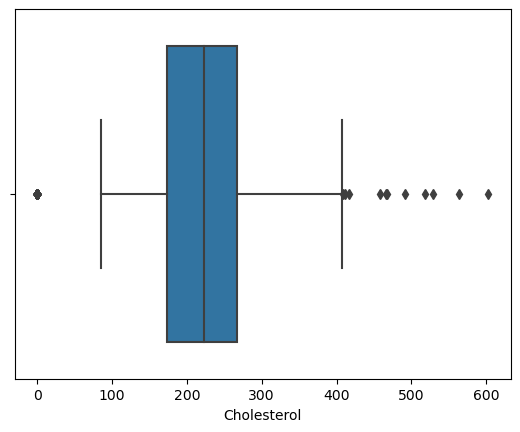

In [15]:
# Detecting Outliers
sns.boxplot(x=heart['Cholesterol'])

<Axes: xlabel='RestingBP'>

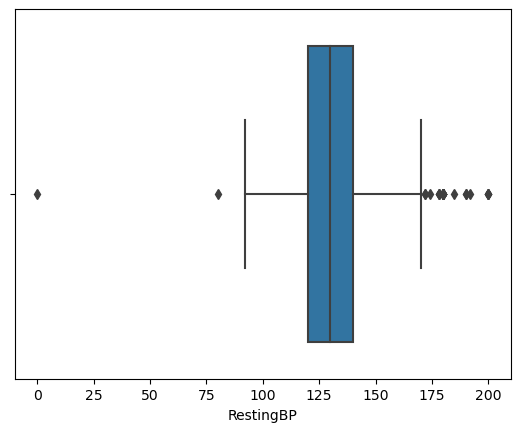

In [16]:
# Detecting Outliers
sns.boxplot(x=heart['RestingBP'])

# BASIC EDA (STEP 2)

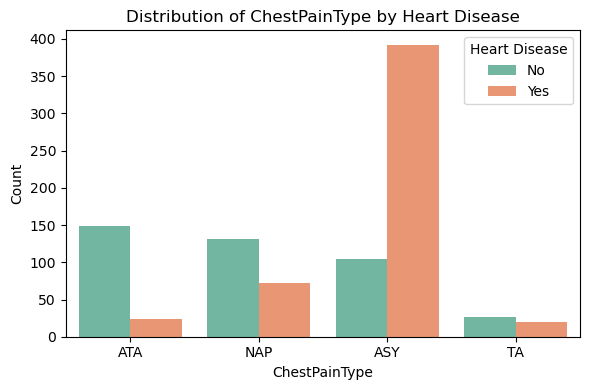

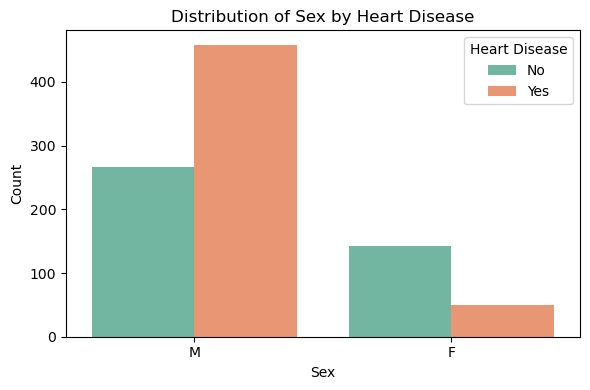

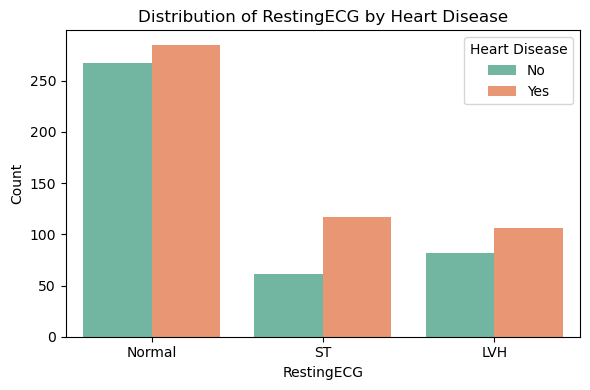

In [17]:
# 2.3.1 Bar Plots for Categorical Features
categorical_features = ['ChestPainType', 'Sex', 'RestingECG']

for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=heart, x=feature, hue='HeartDisease', palette='Set2')
    plt.title(f'Distribution of {feature} by Heart Disease')
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.legend(title="Heart Disease", labels=["No", "Yes"])
    plt.tight_layout()
    plt.show()

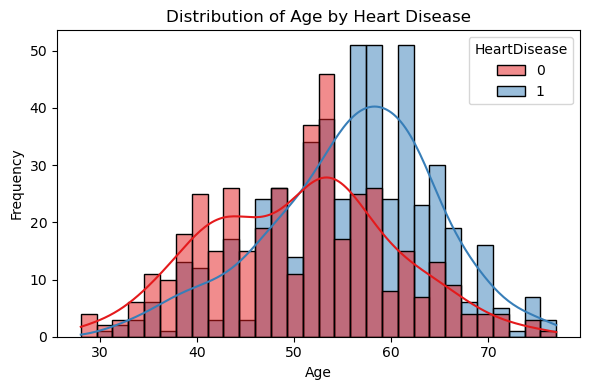

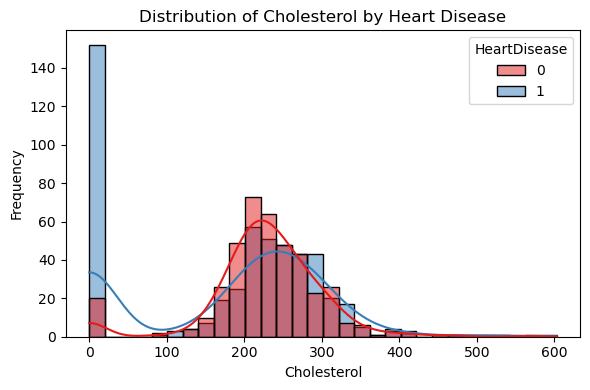

In [18]:
# 2.3.2 Histograms for Continuous Variables
continuous_features = ['Age', 'Cholesterol']

for feature in continuous_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=heart, x=feature, hue='HeartDisease', bins=30, kde=True, palette='Set1')
    plt.title(f'Distribution of {feature} by Heart Disease')
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

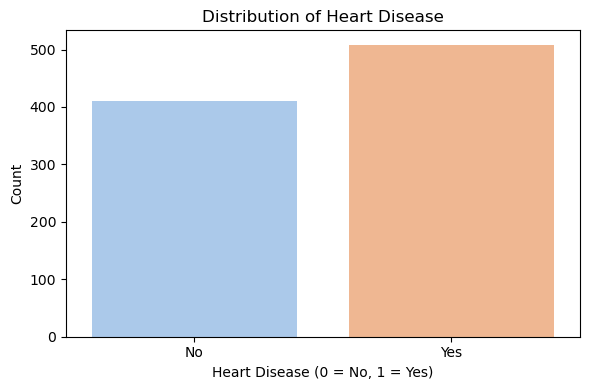

In [19]:
# 2.3.3 Distribution of Heart Disease (Target Variable)
plt.figure(figsize=(6, 4))
sns.countplot(data=heart, x='HeartDisease', palette='pastel')
plt.title("Distribution of Heart Disease")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()
plt.show()

In [20]:
# 2.3.4 Group by target and compare avg cholesterol and max heart rate
grouped = heart.groupby('HeartDisease')[['Cholesterol', 'MaxHR']].mean()
print(grouped)


              Cholesterol       MaxHR
HeartDisease                         
0              227.121951  148.151220
1              175.940945  127.655512


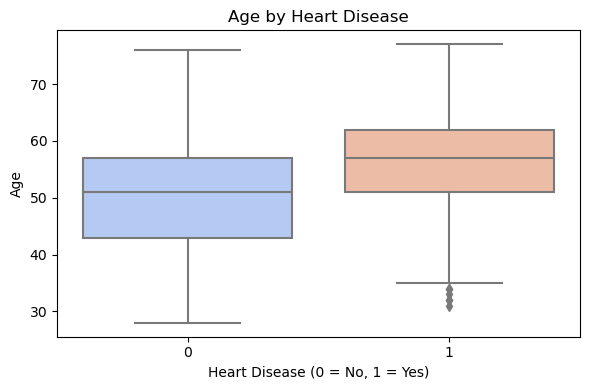

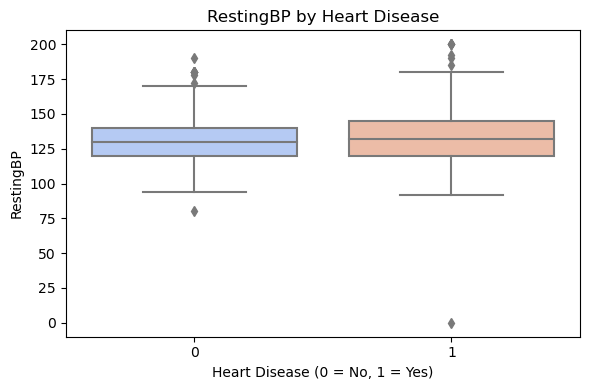

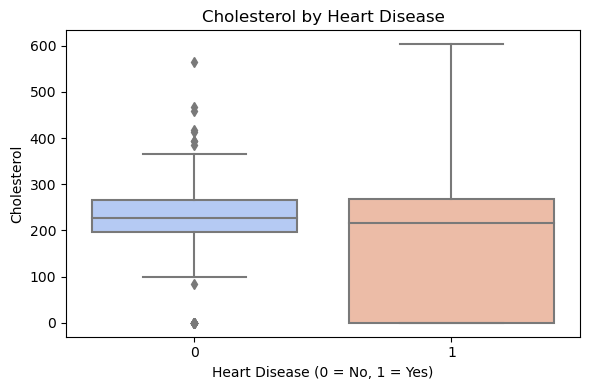

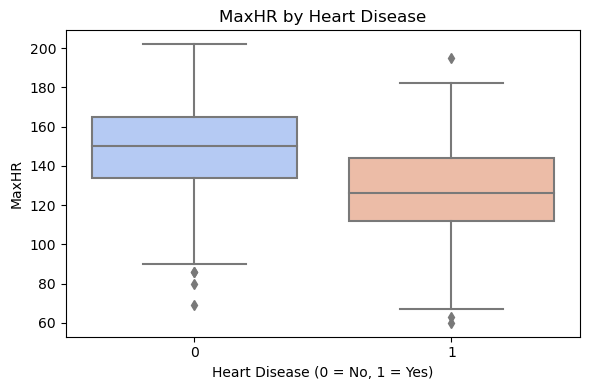

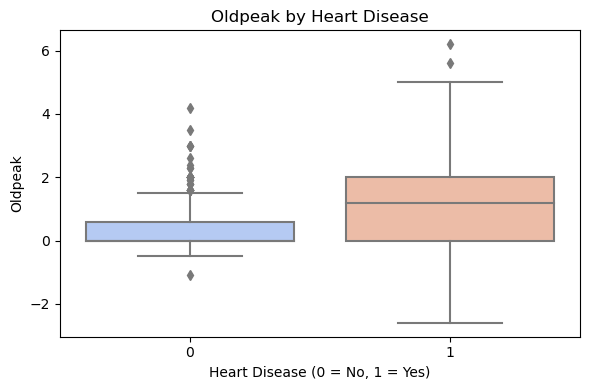

In [21]:
# 2.3.5 Boxplots for numeric columns
numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

for feature in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=heart, x='HeartDisease', y=feature, palette='coolwarm')
    plt.title(f'{feature} by Heart Disease')
    plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

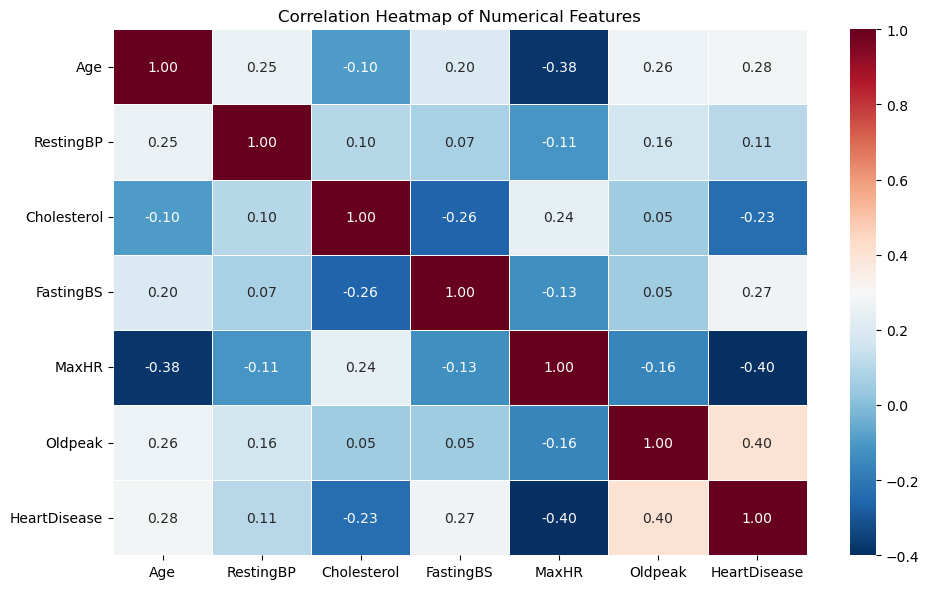

In [22]:
# 2.3.6 Correlation Heatmap
plt.figure(figsize=(10, 6))
corr = heart.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='RdBu_r', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()


# KEY HEALTH PATTERNS

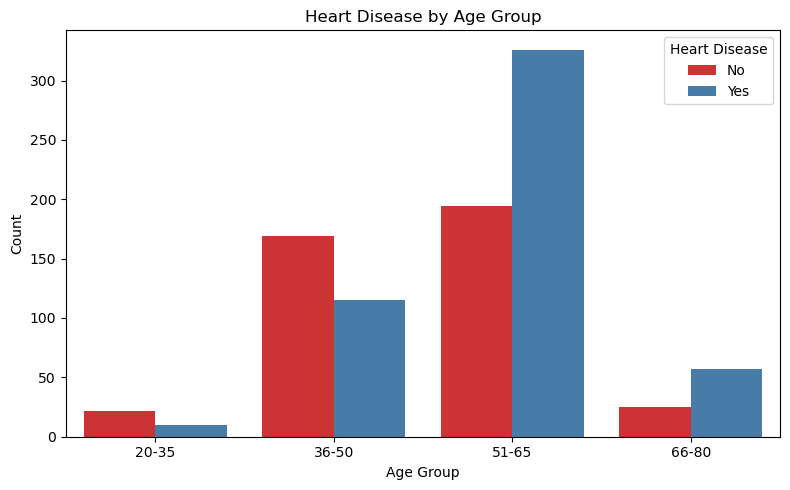

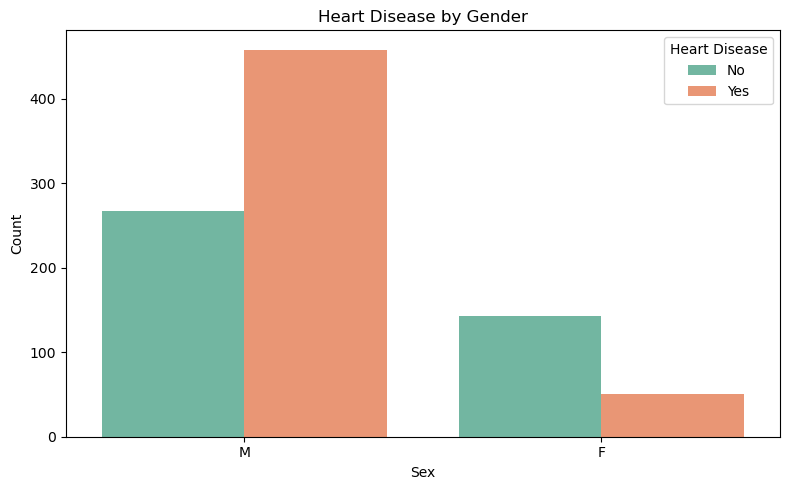

In [23]:
# 3.1 Heart Disease Prevalence by Age Group and Gender
heart['AgeGroup'] = pd.cut(heart['Age'], bins=[20, 35, 50, 65, 80], labels=['20-35', '36-50', '51-65', '66-80'])

plt.figure(figsize=(8, 5))
sns.countplot(data=heart, x='AgeGroup', hue='HeartDisease', palette='Set1')
plt.title("Heart Disease by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(data=heart, x='Sex', hue='HeartDisease', palette='Set2')
plt.title("Heart Disease by Gender")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


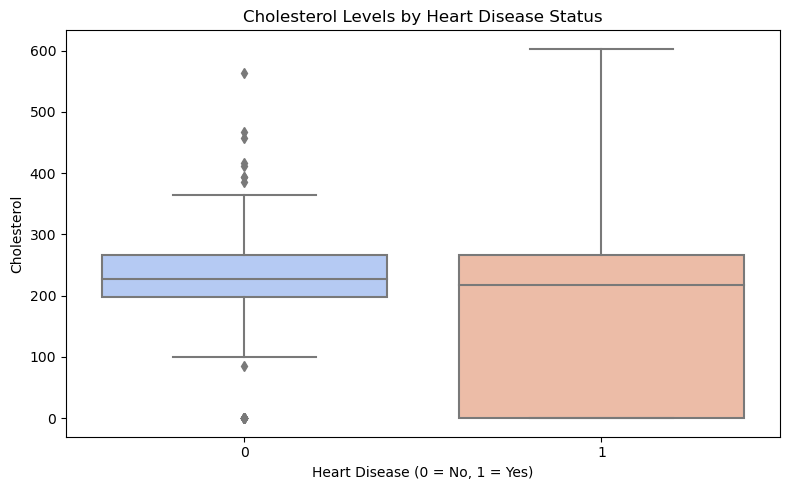

In [24]:
 # 3.2 Cholesterol vs Heart Disease
plt.figure(figsize=(8, 5))
sns.boxplot(data=heart, x='HeartDisease', y='Cholesterol', palette='coolwarm')
plt.title("Cholesterol Levels by Heart Disease Status")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Cholesterol")
plt.tight_layout()
plt.show()

Top Correlated Features with Heart Disease:
Oldpeak        0.403951
MaxHR         -0.400421
Age            0.282039
FastingBS      0.267291
Cholesterol   -0.232741
RestingBP      0.107589
Name: HeartDisease, dtype: float64


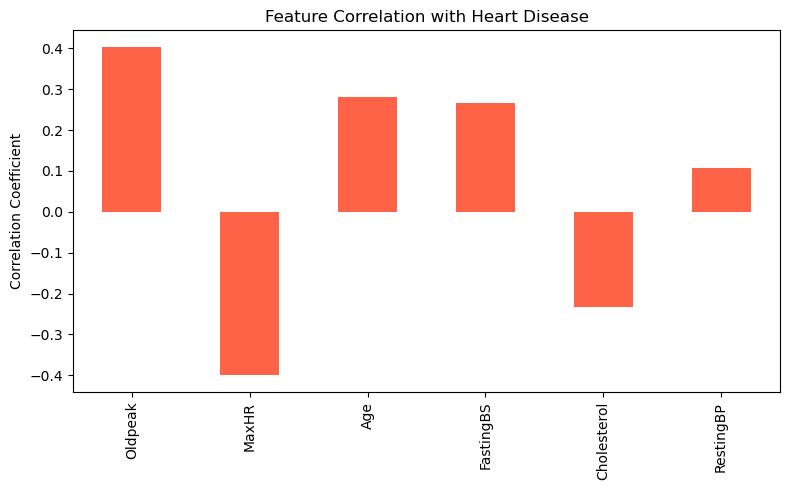

In [25]:
# 3.3 Most Influential Features - Correlation with Heart Disease
correlation = heart.corr(numeric_only=True)
target_corr = correlation['HeartDisease'].drop('HeartDisease').sort_values(key=abs, ascending=False)

print("Top Correlated Features with Heart Disease:")
print(target_corr)

# Visualize
plt.figure(figsize=(8, 5))
target_corr.plot(kind='bar', color='tomato')
plt.title("Feature Correlation with Heart Disease")
plt.ylabel("Correlation Coefficient")
plt.tight_layout()
plt.show()
